In [142]:
import pandas as pd
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [108]:
#read data
filename = "/Users/kingsley/Documents/cs50-ai/learning/src4/banknotes/project-learning/shopping/shopping.csv"
data = pd.read_csv(filename)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [109]:
#data preparation and cleaning
func_rev = lambda x: 1 if x == True else 0
func_vis = lambda x: 1 if x == "Returning_Visitor" else 0
func_weekend = lambda x: 1 if x == True else 0
func_month = lambda x:  datetime.strptime(x, '%b').month-1 if len(x) == 3 else datetime.strptime(x, '%B').month-1
data["Revenue"] = data["Revenue"].apply(func_rev)
data["VisitorType"] = data["VisitorType"].apply(func_vis)
data["Weekend"] = data["VisitorType"].apply(func_weekend)
data["Month"] = data["Month"].apply(func_month)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,1,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,1,2,2,1,2,1,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,4,1,9,3,1,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,1,3,2,2,4,1,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,3,3,1,4,1,1,0


In [110]:
evidence = data.loc[:, "Administrative":"Weekend"]
X = evidence.values
label = data["Revenue"]
y = label.values


In [154]:
 #Split into training and test data 
X_training, X_testing, y_training, y_testing = train_test_split(
    X, y, test_size=0.2
)  
# scaler = StandardScaler() find a way to standardize data.
#define model and train model
model = KNeighborsClassifier(n_neighbors=1)
# model = Perceptron()
#model = svm.SVC()
 
# Fit model
model.fit(X_training, y_training)

# Make predictions on the testing set
predictions = model.predict(X_testing)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[1886  204]
 [ 216  160]]


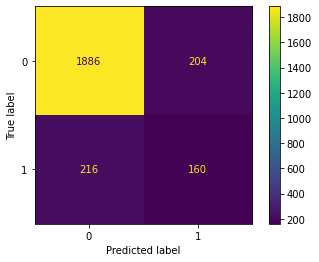

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2090
           1       0.44      0.43      0.43       376

    accuracy                           0.83      2466
   macro avg       0.67      0.66      0.67      2466
weighted avg       0.83      0.83      0.83      2466



In [159]:
# Compute how well we performed
correct = (y_testing == predictions).sum()
incorrect = (y_testing != predictions).sum()
total = len(predictions)

# Print results
# print(f"Results for model {type(model).__name__}")
# print(f"Correct: {correct}")
# print(f"Incorrect: {incorrect}")
# print(f"Accuracy: {100 * correct / total:.2f}%")

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(model,X_testing,y_testing)
print(confusion_matrix(y_testing, predictions))
plt.show()
print(classification_report(y_testing, predictions))